In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt

In [51]:
data= pd.read_excel("/content/BlinkIT Grocery Data.xlsx")
data.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [52]:
data.shape

(8523, 12)

# **Removing The Missing Values For all the columns...**

In [53]:
data.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [55]:
data.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [56]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
data[['Item Weight']] = imputer.fit_transform(data[['Item Weight']])


In [57]:
data.isna().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,0


# As i can see there is no any missing data in the dataset

<h1><font color="cyan">Now Do Some Features Cleaning..</font></h1>

In [58]:
category_counts = data['Item Fat Content'].value_counts()
print(category_counts)

Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64


In [59]:
# Consolidate Item Fat Content into 'Low Fat' and 'Regular'
data['Item Fat Content'] = data['Item Fat Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

In [60]:
data['Item Fat Content'].value_counts()

,count
Item Fat Content,
Low Fat,5517
Regular,3006


In [61]:
fat = data['Item Fat Content'].unique()
print(fat)

['Regular' 'Low Fat']


In [63]:
data.drop('Item Identifier', axis=1, inplace=True)

In [64]:
data.shape

(8523, 11)

In [65]:
data.sample(2)

,Item Fat Content,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
202,Low Fat,Household,2020,OUT017,Tier 2,High,Supermarket Type1,0.027052,20.70,73.9354,5.0
2859,Low Fat,Fruits and Vegetables,2015,OUT045,Tier 2,Medium,Supermarket Type1,0.176352,19.85,220.8772,4.1


In [66]:
data['Item Type'].value_counts()

,count
Item Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [67]:
# Define a mapping dictionary for consolidation
item_type_mapping = {
    'Fruits and Vegetables': 'Food',
    'Snack Foods': 'Food',
    'Frozen Foods': 'Food',
    'Dairy': 'Food',
    'Meat': 'Food',
    'Breads': 'Food',
    'Seafood': 'Food',
    'Starchy Foods': 'Food',
    'Breakfast': 'Food',
    'Soft Drinks': 'Drinks',
    'Hard Drinks': 'Drinks',
    'Household': 'Non-Food Items',
    'Health and Hygiene': 'Non-Food Items',
    'Others': 'Non-Food Items',
    'Canned': 'Packaged Foods',
    'Baking Goods': 'Packaged Foods'
}

# Replace the Item Type column with the consolidated categories
data['Item Type'] = data['Item Type'].replace(item_type_mapping)

# Check the updated value counts
print(data['Item Type'].value_counts())


Item Type
Food              4968
Non-Food Items    1599
Packaged Foods    1297
Drinks             659
Name: count, dtype: int64


Now 2 columns are clean , get back to other column


In [68]:
data['Outlet Establishment Year'] = pd.to_datetime(data['Outlet Establishment Year'], format='%Y')

In [69]:
data.sample(1)

,Item Fat Content,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
7182,Regular,Packaged Foods,2015-01-01,OUT045,Tier 2,High,Supermarket Type1,0.027673,15.7,169.279,4.0


In [70]:
data['Outlet Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT046', 'OUT013', 'OUT045', 'OUT017',
       'OUT010', 'OUT027', 'OUT035', 'OUT019'], dtype=object)

In [71]:
data['Outlet Type'].value_counts()

,count
Outlet Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [72]:
count = data['Outlet Identifier'].value_counts()
print(count)

Outlet Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64


<ipython-input-73-413a216fbd32>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.index, x='Outlet Identifier', data=data, palette='viridis')


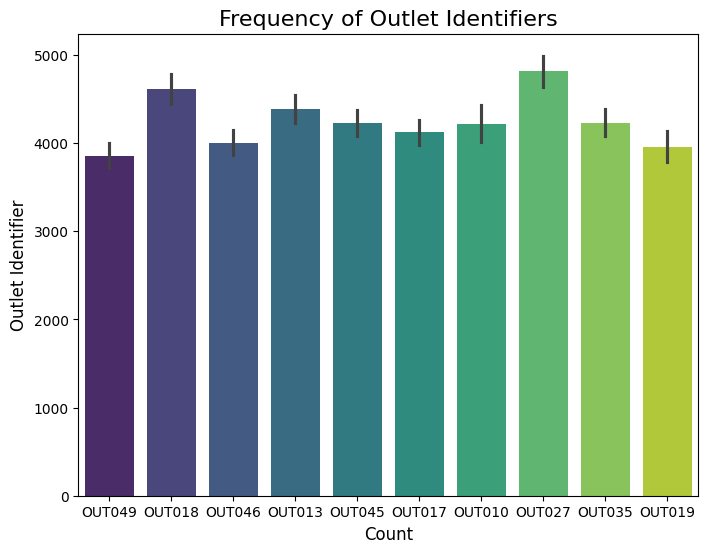

In [73]:
plt.figure(figsize=(8, 6))
sns.barplot(y=data.index, x='Outlet Identifier', data=data, palette='viridis')
plt.title('Frequency of Outlet Identifiers', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Outlet Identifier', fontsize=12)
plt.show()


In [74]:
#Outlet Location Type
data['Outlet Location Type'].value_counts()

,count
Outlet Location Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


In [76]:
data.drop('Outlet Location Type', axis=1, inplace=True)

In [77]:
data.shape

(8523, 10)

In [80]:
data.head(2)

,Item Fat Content,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,Food,2012-01-01,OUT049,Medium,Supermarket Type1,0.100014,15.1,145.4786,5.0
1,Low Fat,Non-Food Items,2022-01-01,OUT018,Medium,Supermarket Type2,0.008596,11.8,115.3492,5.0


In [81]:
#Outlet Size
data['Outlet Size'].value_counts()

,count
Outlet Size,
Medium,3631
Small,3139
High,1753


In [82]:
data['Outlet Type'].value_counts()

,count
Outlet Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [83]:
data['Outlet Type'] = data['Outlet Type'].replace({
    'Supermarket Type1': 'Supermarket',
    'Supermarket Type3': 'Supermarket',
    'Supermarket Type2': 'Supermarket'
})

In [84]:
data.sample(1)

,Item Fat Content,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
7727,Regular,Food,2011-01-01,OUT010,Small,Grocery Store,0.199955,16.7,182.3976,4.0


In [85]:
data['Outlet Type'].nunique()

2

In [86]:
data.drop('Item Visibility', axis =1, inplace =True)

In [87]:
data.shape

(8523, 9)

<h1><font color="Oval">Now Do Some Ploting to vizualize cleaned data...</font></h1>

In [88]:
data.head(4)

,Item Fat Content,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Size,Outlet Type,Item Weight,Sales,Rating
0,Regular,Food,2012-01-01,OUT049,Medium,Supermarket,15.10,145.4786,5.0
1,Low Fat,Non-Food Items,2022-01-01,OUT018,Medium,Supermarket,11.80,115.3492,5.0
2,Regular,Food,2016-01-01,OUT046,Small,Supermarket,13.85,165.0210,5.0
3,Regular,Packaged Foods,2014-01-01,OUT013,High,Supermarket,12.15,126.5046,5.0


Doing EDA

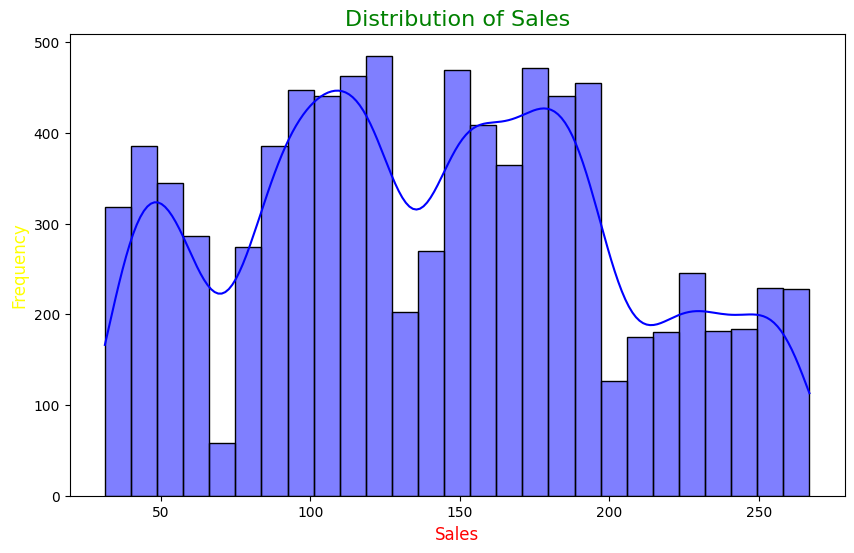

In [96]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], kde=True, color='blue')
plt.title('Distribution of Sales', fontsize=16, color= 'Green')
plt.xlabel('Sales', fontsize=12, color = 'Red')
plt.ylabel('Frequency', fontsize=12, color = 'yellow')
plt.show()

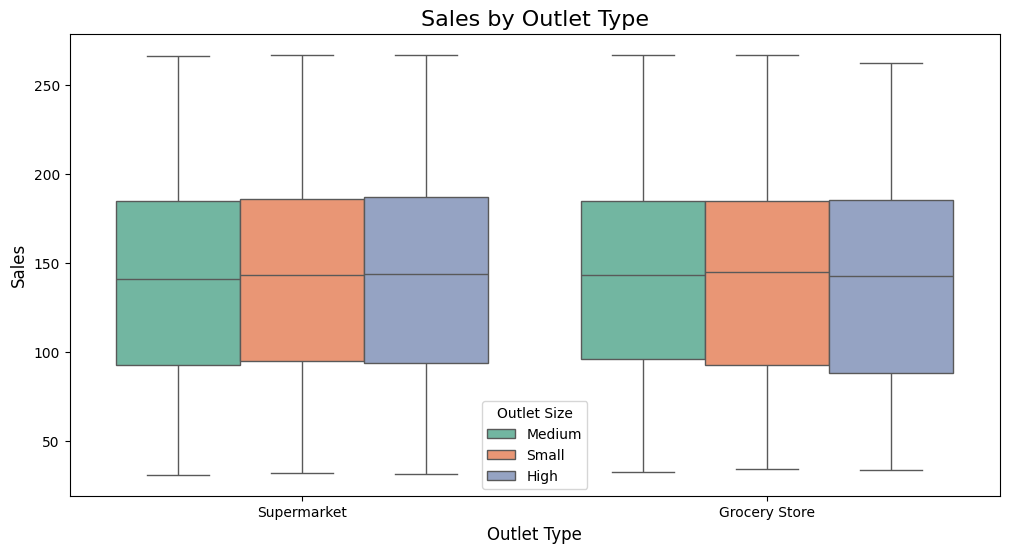

In [98]:
# Example: Sales by Outlet Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet Type', y='Sales', data=data, hue = 'Outlet Size',palette='Set2')
plt.title('Sales by Outlet Type', fontsize=16)
plt.xlabel('Outlet Type', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()


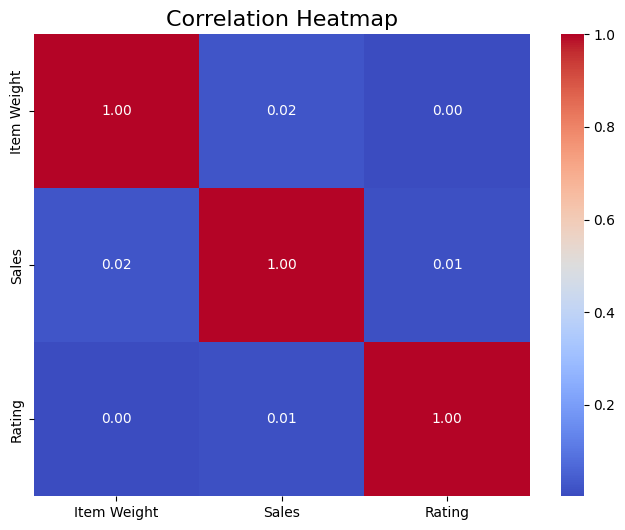

In [101]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = data[['Item Weight', 'Sales', 'Rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()


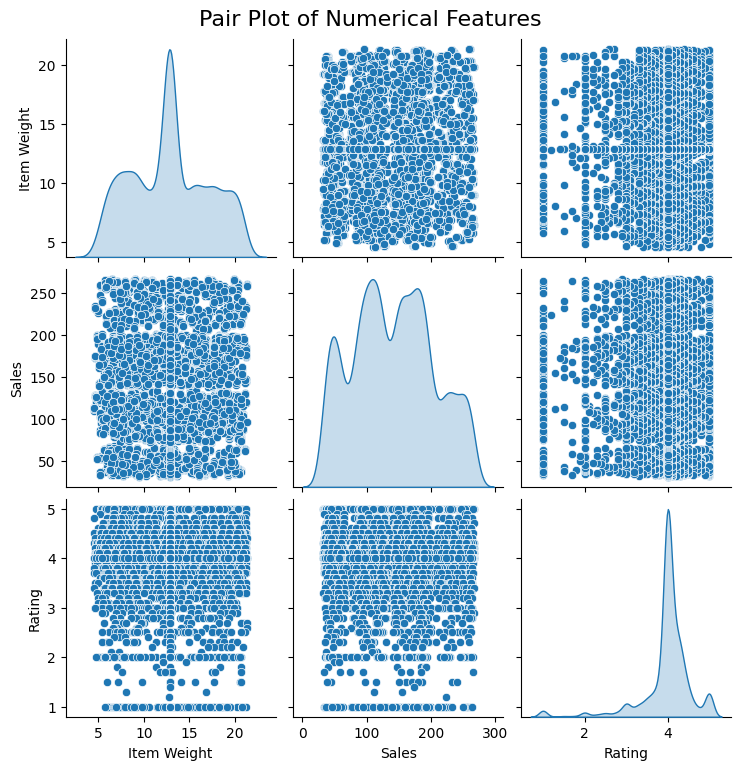

In [105]:
sns.pairplot(data[['Item Weight', 'Sales', 'Rating']], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features', y=1.02, fontsize=16)
plt.show()

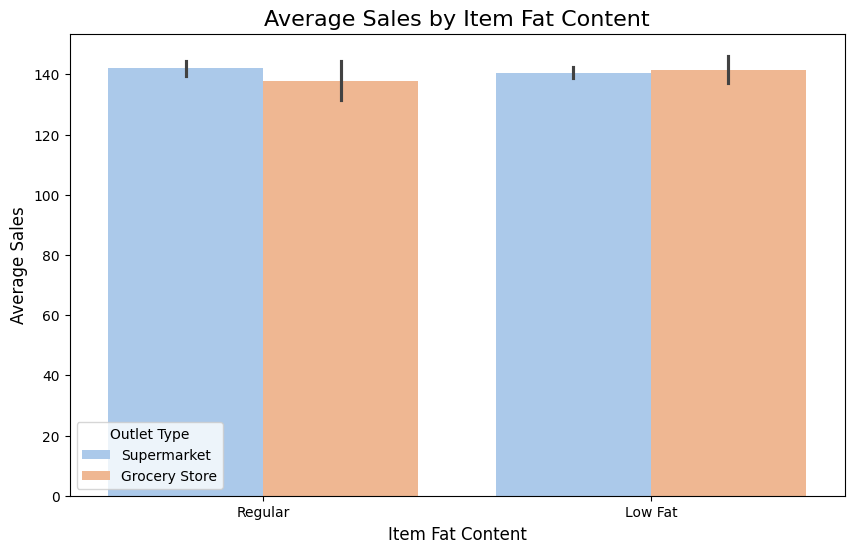

In [107]:
# Example: Average Sales by Item Fat Content
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Fat Content', y='Sales',hue = 'Outlet Type', data=data, palette='pastel')
plt.title('Average Sales by Item Fat Content', fontsize=16)
plt.xlabel('Item Fat Content', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.show()


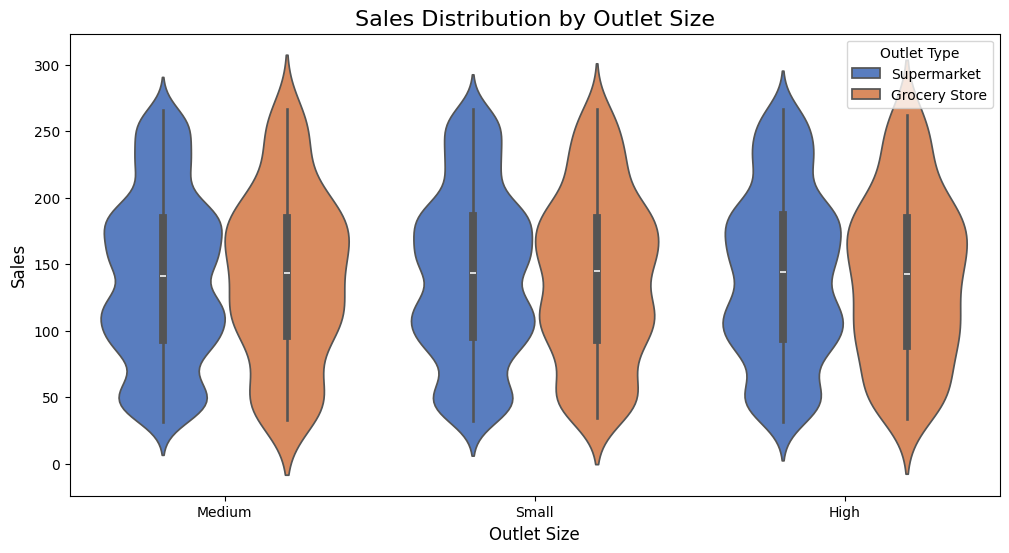

In [109]:
# Example: Sales Distribution by Outlet Size
plt.figure(figsize=(12, 6))
sns.violinplot(x='Outlet Size', y='Sales', hue = 'Outlet Type' ,data=data, palette='muted')
plt.title('Sales Distribution by Outlet Size', fontsize=16)
plt.xlabel('Outlet Size', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()


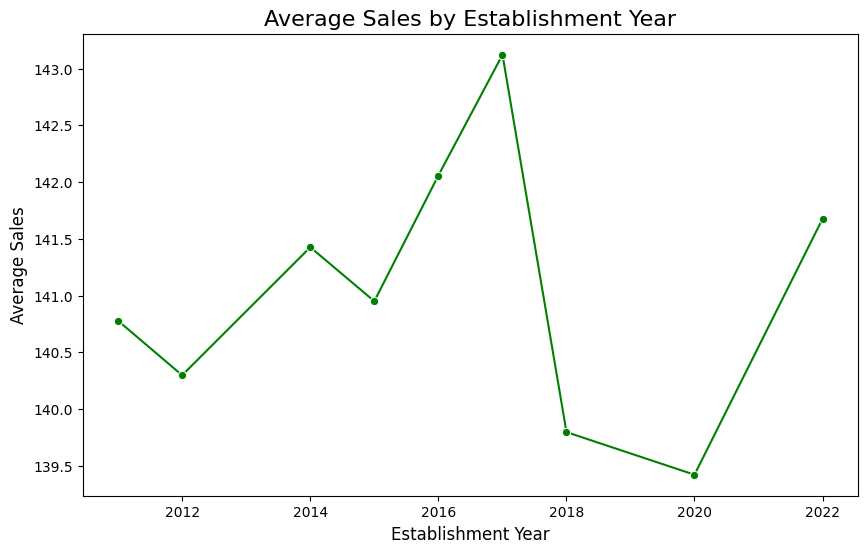

In [110]:
# Example: Average Sales by Establishment Year
avg_sales_by_year = data.groupby('Outlet Establishment Year')['Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Outlet Establishment Year', y='Sales', data=avg_sales_by_year, marker='o', color='green')
plt.title('Average Sales by Establishment Year', fontsize=16)
plt.xlabel('Establishment Year', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.show()


these are the most asked question for the data

In [112]:
# Outlet with Maximum Sales
outlet_sales = data.groupby('Outlet Identifier')['Sales'].sum().reset_index()
max_sales_outlet = outlet_sales[outlet_sales['Sales'] == outlet_sales['Sales'].max()]
print("Outlet with Maximum Sales:")
print(max_sales_outlet)


Outlet with Maximum Sales:
  Outlet Identifier       Sales
6            OUT035  133103.907


In [113]:
# Outlet with Highest Number of Items
outlet_counts = data['Outlet Identifier'].value_counts().reset_index()
outlet_counts.columns = ['Outlet Identifier', 'Count']
max_items_outlet = outlet_counts[outlet_counts['Count'] == outlet_counts['Count'].max()]
print("Outlet with Highest Number of Items:")
print(max_items_outlet)


Outlet with Highest Number of Items:
  Outlet Identifier  Count
0            OUT027    935


In [115]:
# Correlation between Item Weight and Sales
correlation = data['Item Weight'].corr(data['Sales'])
print(f"Correlation between Item Weight and Sales: {correlation}")

Correlation between Item Weight and Sales: 0.024756083186980044


In [116]:
# Year with Maximum Average Sales
avg_sales_by_year = data.groupby('Outlet Establishment Year')['Sales'].mean().reset_index()
max_avg_sales_year = avg_sales_by_year[avg_sales_by_year['Sales'] == avg_sales_by_year['Sales'].max()]
print("Year with Maximum Average Sales:")
print(max_avg_sales_year)


Year with Maximum Average Sales:
  Outlet Establishment Year       Sales
5                2017-01-01  143.122481


In [119]:
# Item Type with Highest Average Rating
avg_rating_by_item = data.groupby('Item Type')['Rating'].mean().reset_index()
max_avg_rating_item = avg_rating_by_item[avg_rating_by_item['Rating'] == avg_rating_by_item['Rating'].max()]
print("Item Type with Highest Average Rating:")
print(max_avg_rating_item)


Item Type with Highest Average Rating:
        Item Type    Rating
2  Non-Food Items  3.989931
